In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
df = pd.read_csv("030524.csv")
df

,date,strain,number,dots,cells
0,305,795,1,12,68
1,305,795,1,16,65
2,305,795,1,16,77
3,305,795,2,5,48
4,305,795,2,8,71
5,305,795,2,6,47
6,305,795,2,9,59
7,305,795,3,14,75
8,305,795,3,13,55
9,305,795,3,8,59


In [3]:
# calculate SE / cells (%)
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,strain,number,date,dots,cells,SE
0,795,1,915,44,210,20.952381
1,795,2,1220,28,225,12.444444
2,795,3,915,35,189,18.518519
3,1058,1,1220,31,191,16.230366
4,1058,2,915,33,227,14.537445
5,1058,3,1220,28,197,14.213198
6,1060,1,1220,57,248,22.983871
7,1060,2,915,50,238,21.008403
8,1060,3,1220,69,250,27.600000


In [4]:
# calculate average and sem in different strains
# wt, atg21D, hsv2D
SE_mean = df_number.groupby("strain").mean()["SE"]
SE_sem = df_number.groupby("strain").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

strain
795     17.305115
1058    14.993670
1060    23.864091
Name: SE, dtype: float64
[2.52985557 0.62539269 1.95306406]


## Welth's t-test collected with Holm-sidak

In [5]:
WT_SE = df_number[df_number["strain"] == 795]["SE"]
atg21_SE = df_number[df_number["strain"] == 1058]["SE"]
hsv2_SE = df_number[df_number["strain"] == 1060]["SE"]

In [6]:
statistic, atg21_pvalue = stats.ttest_ind(WT_SE, atg21_SE, equal_var=False)
atg21_pvalue

0.4597885724880613

In [7]:
statistic, hsv2_pvalue = stats.ttest_ind(WT_SE, hsv2_SE, equal_var=False)
hsv2_pvalue

0.11388685991724885

In [8]:
multipletests(pvals=[atg21_pvalue, hsv2_pvalue], alpha=0.05, method="holm-sidak")

(array([False, False]),
 array([0.45978857, 0.2148035 ]),
 0.025320565519103666,
 0.025)

## figure

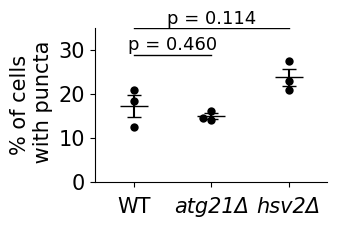

In [9]:
y = -7
fontsize=15
fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
sns.swarmplot(x="strain", y="SE", data=df_number.iloc[:9], size=6, color="black")
ax.errorbar(x=[0, 1, 2], y=SE_mean[0:3], yerr=SE_sem[0:3], capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
# label of each strains
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "atg21Δ", ha="center", fontstyle="italic", fontsize=fontsize)
ax.text(2, y, "hsv2Δ", ha="center", fontstyle="italic", fontsize=fontsize)
# frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot([0, 1], [29, 29], color='k', lw=1)
ax.text(0.5, 30, f'p = {atg21_pvalue:.3f}', ha='center', fontsize=fontsize-2)
ax.plot([0, 2], [35, 35], color='k', lw=1)
ax.text(1, 36, f'p = {hsv2_pvalue:.3f}', ha='center', fontsize=fontsize-2)

# x and y axis
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_ylim(0, 35)
ax.set_xlim(-0.5, 2.5)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["0", "10", "20", "30"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

fig.savefig("output.jpg", bbox_inches="tight")